In [1]:
# import os
# os.environ['DATA_READER_VENDOR'] = 'tiingo'
%pylab inline
from requests import post
from app.analysis import Quote
def screen_securities(after=None):
    query = 'query screen($limit:[SecurityLimitOptionInput!]!,$after:String){viewer{screenSecurities(filterTypes:EQUITY,limit:$limit,sort:{type:MARKET_CAP,direction:DESC},first:100,after:$after){pageInfo{hasNextPage,endCursor},edges{node{symbol}}}}}'
    variables = {'limit':[{'type':'MARKET_CAP','min':32000000000,'inclusive':True}],'after':after}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    cursor = r['data']['viewer']['screenSecurities']['pageInfo']['endCursor']
    return [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['screenSecurities']['edges']], cursor
s1, after = screen_securities()
s2, after = screen_securities(after)
symbols = s1 + s2 + screen_securities(after)[0]
print(len(symbols))
quote = Quote(symbols, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
294
from 2019-05-28 to 2019-07-12 - 294


In [2]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > 0) & (stats['len'] == stats['len'].max())]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

273


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
AGN,28,1.044318,2.247655,0.461095,26.208052,11.932121
MU,28,0.921751,1.319173,0.692717,35.124469,7.183739
TSLA,28,0.863040,0.856320,0.998579,29.878116,5.735805
SQ,28,0.780323,0.951019,0.812168,25.007595,7.900335
NEM,28,0.675196,0.584203,1.142171,24.980336,2.102607
PSX,28,0.656440,0.427086,1.518436,21.582654,3.084984
BX,28,0.606278,0.752472,0.795168,15.396187,5.090277
AMD,28,0.600057,1.459296,0.405758,14.320138,13.150764
JD,28,0.595218,0.628039,0.935103,18.219851,3.142856


{'AGN': 0.055, 'BBD': 0.18, 'EPD': 0.116, 'HD': 0.151, 'NEE': 0.081, 'RIO': 0.196, 'TJX': 0.222} 0.348


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,28.0,0.351371,0.059378,0.232339,0.317748,0.351530,0.384236,0.500550,5.783912,11.057807,0.540698
HD,28.0,0.436956,0.405977,-0.407789,0.178050,0.466470,0.846924,1.006928,1.056758,14.727601,3.081654
TJX,28.0,0.365851,0.413133,-0.483635,0.046325,0.537794,0.690123,0.878651,0.866341,13.221488,2.512007
EPD,28.0,0.264026,0.341393,-0.297762,0.036396,0.246695,0.528249,0.865300,0.750129,8.790033,2.320814
BBD,28.0,0.433649,0.647504,-0.843525,0.065800,0.367376,0.847719,1.713735,0.657468,17.029656,4.374995
NEE,28.0,0.186469,0.294678,-0.407050,0.040454,0.169542,0.353965,0.807395,0.605857,4.414077,2.463972
AGN,28.0,1.044318,2.247655,-1.808473,-0.386210,0.311209,1.777116,6.529686,0.461095,26.208052,11.932121
RIO,28.0,0.101429,0.589271,-0.804422,-0.408579,0.076967,0.605468,1.212203,0.158659,0.131945,5.774361


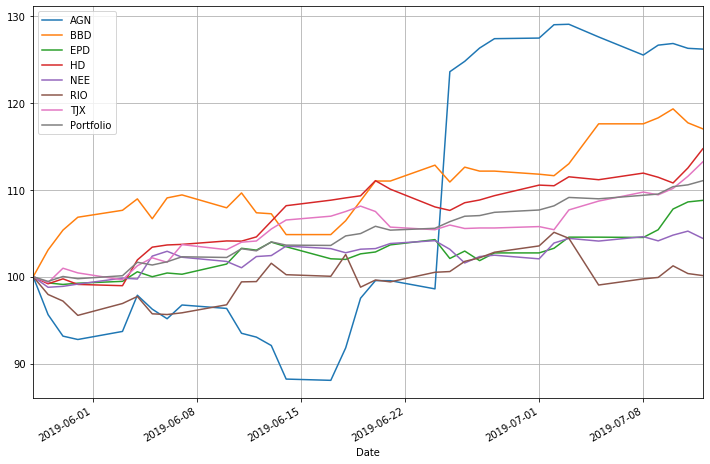

In [3]:
quote.setup_mask(['AGN', 'BBD', 'EPD', 'HD', 'NEE', 'RIO', 'TJX'])
ratio, mean, *_ = quote.find_optimal_ratio()
print(ratio, mean)
quote.graph(ratio)

evicted VZ 0.601 -0.435
evicted ET 0.640 -0.430
evicted HCA 0.627 -0.480
evicted KDP 0.657 -0.472
evicted INFY 0.572 -0.276
evicted RBS 0.693 -0.441
evicted CTSH 0.633 -0.328
evicted MFG 0.653 -0.449
evicted BSX 0.590 -0.386
evicted SMFG 0.672 -0.333
evicted RDS-B 0.665 -0.332
evicted QCOM 0.515 -0.398
evicted BA 0.472 -0.412
evicted MUFG 0.654 -0.357
evicted ILMN 0.333 -0.315
evicted UBER 0.560 -0.486
evicted VALE 0.343 -0.383
evicted HD 0.476 -0.436
evicted DG 0.496 -0.385
retry backlogs ['DD', 'TMUS', 'MNST', 'EC', 'FDX', 'GILD', 'HMC', 'HUM', 'RTN', 'T', 'UTX', 'SNY', 'PFE', 'AAPL', 'ADSK', 'AMGN', 'MAR', 'VOD', 'SPGI', 'ORAN', 'GD', 'ATVI', 'BLK', 'AFL', 'CME', 'EMR', 'CMCSA', 'AON', 'MRK', 'SYY', 'DOW', 'NOC', 'ADI', 'ISRG', 'GE', 'KHC', 'EBAY', 'BAX', 'ALL', 'BKNG', 'TSM', 'AVGO', 'MA', 'GM', 'BABA', 'ITW', 'MSFT', 'TXN', 'DE', 'AMX', 'CHU', 'PBR-A', 'CNQ', 'AMZN', 'PEP', 'NOW', 'ADP', 'MDLZ', 'FMX', 'TM', 'UPS', 'WBA', 'BX', 'SQ', 'TAK', 'CHTR', 'AMD', 'LIN', 'CRM', 'SHOP', 'CV

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,28.0,0.351371,0.059378,0.232339,0.317748,0.351530,0.384236,0.500550,5.783912,11.057807,0.540698
HD,28.0,0.436956,0.405977,-0.407789,0.178050,0.466470,0.846924,1.006928,1.056758,14.727601,3.081654
TJX,28.0,0.365851,0.413133,-0.483635,0.046325,0.537794,0.690123,0.878651,0.866341,13.221488,2.512007
EPD,28.0,0.264026,0.341393,-0.297762,0.036396,0.246695,0.528249,0.865300,0.750129,8.790033,2.320814
BBD,28.0,0.433649,0.647504,-0.843525,0.065800,0.367376,0.847719,1.713735,0.657468,17.029656,4.374995
NEE,28.0,0.186469,0.294678,-0.407050,0.040454,0.169542,0.353965,0.807395,0.605857,4.414077,2.463972
AGN,28.0,1.044318,2.247655,-1.808473,-0.386210,0.311209,1.777116,6.529686,0.461095,26.208052,11.932121
RIO,28.0,0.101429,0.589271,-0.804422,-0.408579,0.076967,0.605468,1.212203,0.158659,0.131945,5.774361


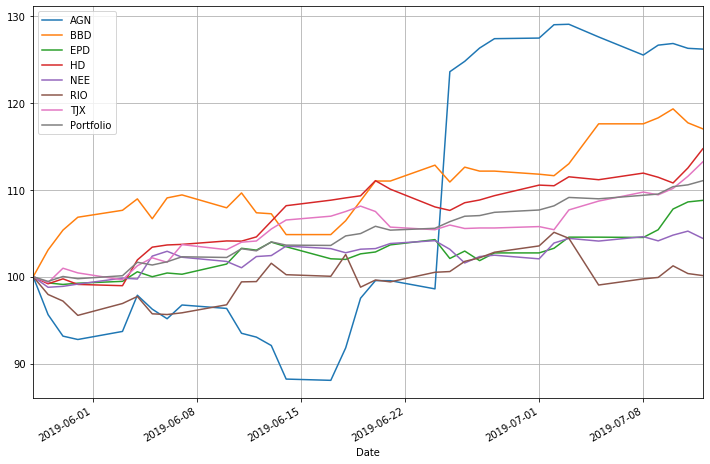

In [4]:
bounds = .28, .42
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(min_percent=.05, max_count=8, backlogs_pos_threshold=.7, bounds=bounds)
quote.setup_mask(['AGN', 'BBD', 'EPD', 'HD', 'NEE', 'RIO', 'TJX'])
sd.update(quote.optimize_portfolio(min_percent=.05, max_count=8, bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(min_percent=.05, max_count=8, bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)